# Modified Random Walks: 
In the RandomWalk class, x_step and y_step are
generated from the same set of conditions. The direction is chosen randomly
from the list [1, -1] and the distance from the list [0, 1, 2, 3, 4]. Modify the
values in these lists to see what happens to the overall shape of your walks. Try
a longer list of choices for the distance, such as 0 through 8, or remove the −1
from the x- or y-direction list.

# Introduction

I've created this Python code to demonstrate the generation and visualization of random walks. Random walks represent paths formed by a series of random decisions and are commonly used to model processes with inherent randomness. In this code, I will illustrate how to create and visualize random walks on a 2D plane using Matplotlib.

## RandomWalk Class

### Class Initialization

I started by defining a RandomWalk class, which serves as the core for generating random walks. In the constructor (__init__ method), I set up the initial attributes:

num_points: This attribute represents the number of points in the walk, and I've set its default value to 5000.
x_values and y_values: These two lists will store the x- and y-coordinates of each point in the walk, with the initial point being at the origin (0, 0).

### Filling the Walk

The fill_walk method:

A while loop runs until the desired number of points (num_points) is reached.
Inside the loop, I generate random steps in both the x and y directions using the get_step method.
If both x_step and y_step are zero, this indicates no movement, so I continue to the next iteration.
To calculate the new coordinates, I add the step values to the last recorded coordinates, and the new points are appended to the x_values and y_values lists.

### Generating Random Steps

For generating random steps, I've implemented the get_step method, which determines both the direction and distance for each step:

I randomly choose the direction from the list [1, -1], where 1 represents movement to the right, and -1 represents movement to the left.
Distance is randomly chosen from the list [0, 1, 2, 3, 4, 5, 6, 7, 8], allowing for various step lengths.
The step value is calculated as the product of the direction and distance, determining the step size.

## Generating and Visualizing Random Walks

In this section, I generate and visualize random walks within an infinite loop (while True). Here are the steps:

### Random Walk Generation

I create an instance of the RandomWalk class with 5000 points (this number is adjustable) using rw = RandomWalk(5000).
I call the fill_walk method to generate the random walk data.

### Setting Up the Plot

I configure the Matplotlib plot by creating a figure and axis (fig, ax = plt.subplots(figsize=(15, 9))).
Instead of using ax.scatter(), I opt for ax.plot() to create the plot, adjusting the linewidth as needed.

### Emphasizing Start and End Points

The code highlights the start point (0, 0) in green and the end point (the last recorded coordinates) in red. Both points are marked with larger markers.

### Cleaning Up the Plot

To create a cleaner visual, I hide the x and y axes using ax.get_xaxis().set_visible(False) and ax.get_yaxis().set_visible(False).
I set the aspect ratio to 'equal' to avoid distortion by using ax.set_aspect('equal').

### Displaying the Plot

Finally, I display the plot using plt.show().

### User Input

After displaying each walk, I prompt the user to input whether they want to generate another walk (y for yes, n for no).
If the user enters 'n', the loop breaks, and the program concludes.

This code offers an interactive environment to generate and visualize random walks. Feel free to experiment with different parameters, such as the number of points or step size, to explore various patterns and behaviors in the random walks.

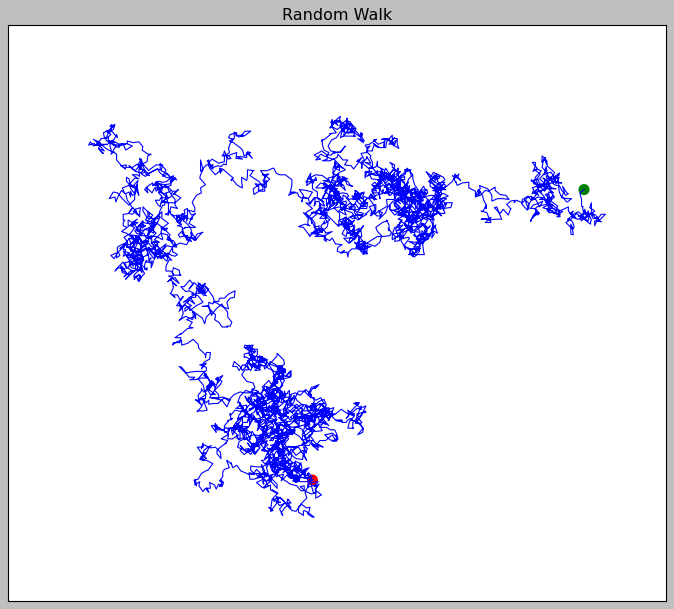

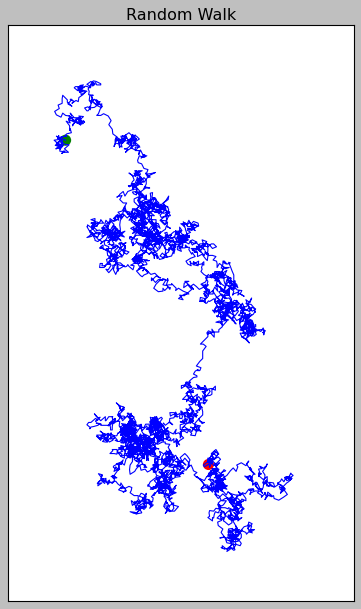

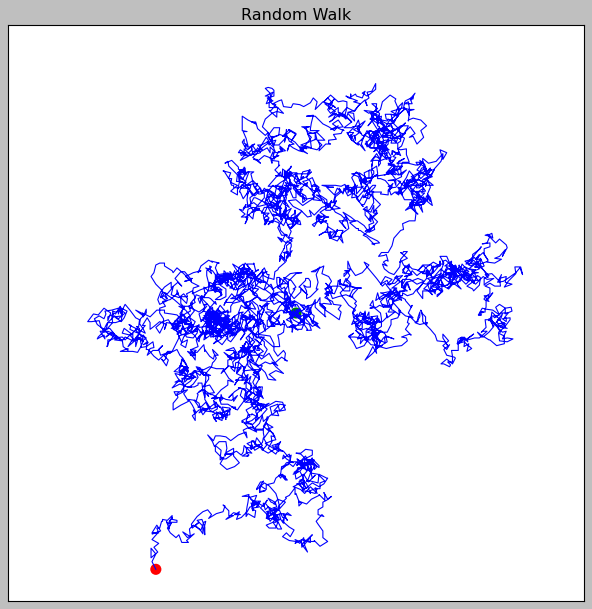

In [1]:
import matplotlib.pyplot as plt
from random import choice

class RandomWalk:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values) < self.num_points:
            x_step = self.get_step()
            y_step = self.get_step()

            if x_step == 0 and y_step == 0:
                continue

            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)

    def get_step(self):
        """Calculate a random step (direction and distance)."""
        direction = choice([1, -1])
        distance = choice(list(range(9)))  # Changed to 0 through 8
        step = direction * distance
        return step

# Generating and Visualizing Random Walks

# Inside the loop:
while True:
    rw = RandomWalk(5000)  # Using 5000 points
    rw.fill_walk()

    # Create a range of point numbers for coloring
    point_numbers = range(rw.num_points)

    plt.style.use('classic')
    fig, ax = plt.subplots(figsize=(15, 9))

    # Replace ax.scatter() with ax.plot()
    ax.plot(rw.x_values, rw.y_values, linewidth=1)  # Adjust linewidth as needed

    ax.scatter(0, 0, c='green', edgecolors='none', s=100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.set_aspect('equal')
    plt.title("Random Walk")

    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break
